In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Landslide Analysis


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

sns.set_style('whitegrid')

### Importing the dataset

In [3]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Landslide-Analysis-main/globallandslides.csv')
df_copy = pd.read_csv('drive/MyDrive/Colab Notebooks/Landslide-Analysis-main/globallandslides.csv')  # making a copy of dataframe 

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [6]:
df = df[df.country_name=="India"]  # Selecting data for India 

In [7]:
df["Year"] = pd.to_datetime(df["event_date"]).dt.year    # This extracts the year in which the event took place

In [8]:
df = df[df.landslide_category=="landslide"]  # Selecting only landslide category

##  Task 1 : A map of only landslides that have happened within India

In [9]:
ls_df = df   # making a dataframe of landslides 
ls_df = ls_df.dropna(axis=0, subset=['admin_division_name'])
ls_df

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,Year
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1055,07/22/2009 12:00:00 AM,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1055.0,India,IN,Bengal,46427.0,Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600,2009
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1054,07/22/2009 12:00:00 AM,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1054.0,India,IN,Bengal,46427.0,Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200,2009
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,2164,07/29/2010 11:00:00 PM,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,2164.0,India,IN,Manipur,15118.0,Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863,2010
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,3821,07/21/2011 12:00:00 AM,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,rain,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,3821.0,India,IN,Uttarakhand,32442.0,Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400,2011
66,Tribune India.com,NaN,37,03/19/2007 12:00:00 AM,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,rain,medium,unknown,2.0,NaN,NaN,NaN,NaN,glc,37.0,India,IN,Kashmir,14711.0,Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.877800,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,headlinesindia,http://www.headlinesindia.com/natural-disaster...,1030,05/26/2009 12:00:00 AM,NaN,"Darjeeling Sadar, Darjeeling West Bengal","With the recovery of three more bodies, the to...","Darjeeling Sadar, Darjeeling West Bengal",25km,landslide,tropical_cyclone,medium,unknown,14.0,NaN,Cyclone Aila,NaN,NaN,glc,1030.0,India,IN,Bengal,123797.0,Dārjiling,0.79891,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.265221,27.043571,2009
9852,www.greaterkashmir.com,http://www.greaterkashmir.com/news/2013/Jun/12...,4913,06/11/2013 11:00:00 PM,NaN,"Srinagar-Jammu Highway, Ramban District",While pre-monsoon showers brought much needed ...,"Srinagar-Jammu Highway, Ramban District",unknown,landslide,rain,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,4913.0,India,IN,Himachal Pradesh,6690.0,Ghumārwīn,6.68727,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,76.670200,31.488100,2013
9859,The Times of India,http://timesofindia.indiatimes.com/city/dehrad...,7294,07/24/2015 12:00:00 AM,NaN,Kempty Road near Kempty Falls,"two more landslides occurred since Friday, one...",Kempty Road near Kempty Falls,25km,landslide,continuous_rain,small,above_road,0.0,0.0,NaN,NaN,NaN,glc,7294.0,India,IN,Uttarakhand,25753.0,Mussoorie,15.12471,07/29/2015 06:47:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,78.104500,30.452800,2015
9865,ibnlive.in,http://ibnlive.in.com/news/crops-worth-rs-185-...,3566,06/02/2011 12:00:00 AM,NaN,"Munnar, Id

### Performing data cleaning

In [10]:
# Data cleaning
ls_df["admin_division_name"].replace("Nāgāland", "Nagaland",inplace = True) 
ls_df["admin_division_name"].replace("Meghālaya", "Meghalaya",inplace = True)
ls_df["admin_division_name"].replace("Tamil Nādu", "Tamilnadu",inplace = True)
ls_df["admin_division_name"].replace("Karnātaka", "Karnataka",inplace = True)
ls_df["admin_division_name"].replace("Gujarāt", "Gujarat",inplace = True)
ls_df["admin_division_name"].replace("Arunāchal Pradesh", "Arunachal Pradesh",inplace = True)
ls_df["admin_division_name"].replace("Andaman and Nicobar Islands", "Andaman & Nicobar",inplace = True)
ls_df["admin_division_name"].replace("State of Odisha", "Odisha",inplace = True)
ls_df["admin_division_name"].replace("Telangana", "Telengana",inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
state_df = ls_df["admin_division_name"].value_counts()   # This gives the number of landslides that took place in every state over the years
state_df = state_df.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State', 'Count']                    # Renaming the columns 

In [12]:
state_df.head()

,State,Count
0,Kashmir,189
1,Uttarakhand,167
2,Himachal Pradesh,137
3,Assam,74
4,Nagaland,65


In [13]:
state_df.at[15,"Count"] = 69   # Since the entries "Bengal" and "West Bengal" are same, therefore merging them as one entry.
state_df.drop(7)

,State,Count
0,Kashmir,189
1,Uttarakhand,167
2,Himachal Pradesh,137
3,Assam,74
4,Nagaland,65
5,Maharashtra,54
6,Manipur,47
8,Kerala,43
9,Arunachal Pradesh,40
10,Tamil Nadu,29


### Using GeoPandas to plot maps

In [14]:
fp = "drive/MyDrive/Colab Notebooks/Indianstate/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
map_df

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382..."


In [15]:
map_df.at[2,"State_Name"] = "Daman and Diu"

In [16]:
state_df.at[0,"State"] = "Jammu and Kashmir"       # Renaming certain entries to avoid conflicts while merging
state_df.at[20,"State"] = "Delhi"

In [17]:
#Merging the data
merged = map_df.set_index('State_Name').join(state_df.set_index('State'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged

,geometry,Count
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",0.0
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",15.0
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",40.0
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",74.0
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",1.0
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",0.0
Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",0.0
Daman and Diu,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",0.0
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",3.0
Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",19.0


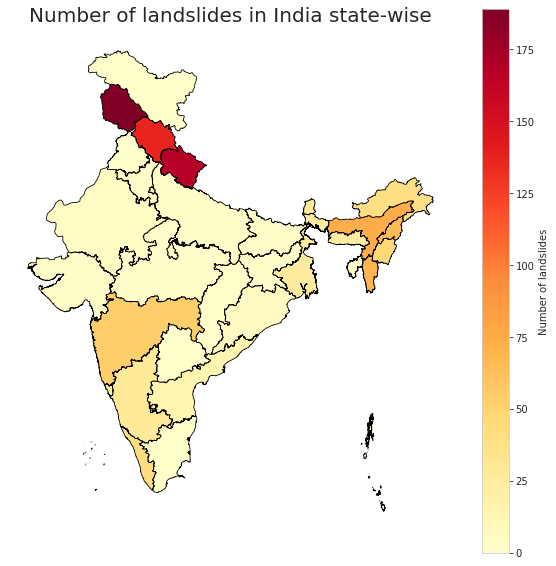

In [18]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of landslides in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})

# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', \
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of landslides"})

In [19]:
# Finding the latitudes and longitudes of landslides that took place in India
lat = df['latitude'].tolist()      
long = df['longitude'].tolist()

In [20]:
india_state_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Landslide-Analysis-main/state wise lat and long.csv')     # Reading the coordinates of Indian states for plotting purpose
india_state_df

,State,Longitude,Latitude
0,Andaman and Nicobar,92.904257,11.845455
1,Andhra Pradesh,79.973851,16.557796
2,Arunachal Pradesh,94.662314,27.729050
3,Assam,92.685686,26.336086
4,Bihar,85.625341,25.766303
5,Chandigarh,76.758725,30.742600
6,Chhattisgarh,82.127827,21.551960
7,Dadra and Nagar Haveli,73.094550,20.215132
8,Daman and Diu,72.280448,20.513802
9,Delhi,77.128045,28.645944


In [21]:
india_state_df.at[0,"State"] = "Andaman & Nicobar"    # Renaming certaing entries to avoid conflicts while merging
india_state_df.at[25,"State"] = "Odisha"  
india_state_df.at[33,"State"] = "Uttarakhand"  
india_state_df.at[30,"State"] = "Tamilnadu"  

In [22]:
# Merge the data
state_merged_df = map_df.set_index('State_Name').join(india_state_df.set_index('State'))

In [23]:
state_merged_df.reset_index(level=0, inplace=True)
state_merged_df

,index,geometry,Longitude,Latitude
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",92.904257,11.845455
1,Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",79.973851,16.557796
2,Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",94.662314,27.729050
3,Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",92.685686,26.336086
4,Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",85.625341,25.766303
5,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",76.758725,30.742600
6,Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",NaN,NaN
7,Daman and Diu,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",72.280448,20.513802
8,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",77.128045,28.645944
9,Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",73.865741,15.394225


In [24]:
# Handling missng values
state_merged_df.at[32,"Latitude"] = 18.1124
state_merged_df.at[32,"Longitude"] = 79.0193
state_merged_df.at[17,"Latitude"] = 34.2268
state_merged_df.at[17,"Longitude"] = 77.5619
state_merged_df.at[6,"Latitude"] = 21.2787
state_merged_df.at[6,"Longitude"] = 81.8661

In [25]:
state_merged_df

,index,geometry,Longitude,Latitude
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",92.904257,11.845455
1,Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",79.973851,16.557796
2,Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",94.662314,27.729050
3,Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",92.685686,26.336086
4,Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",85.625341,25.766303
5,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",76.758725,30.742600
6,Chhattishgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",81.866100,21.278700
7,Daman and Diu,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",72.280448,20.513802
8,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",77.128045,28.645944
9,Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",73.865741,15.394225


### The above analysis was done at national level. However one can perform state-wise landslide analysis as well. Below is an example for the state of Assam.

In [40]:
# Finding the latitudes and longitudes of landlides that took place in Assam
lat = df[df['admin_division_name'] == "Himachal Pradesh"]['latitude'].tolist()      
long = df[df['admin_division_name'] == "Himachal Pradesh"]['longitude'].tolist()

In [41]:
len(lat)

137

In [42]:
len(long)

137

In [29]:
fp = 'drive/MyDrive/Colab Notebooks/Landslide-Analysis-main/Districts shape file/Census_2011/2011_Dist.shp'
bh_df = gpd.read_file(fp)                           # Reads the shape file of Assam for plotting purpose
bh_df.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [30]:
bh_df  = bh_df[bh_df.ST_NM == "Bihar"]

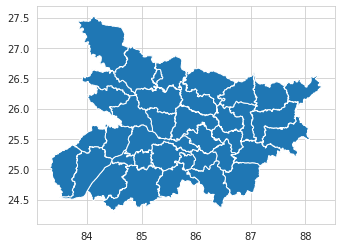

In [31]:
bihar_df = bh_df[['DISTRICT', 'geometry']]
bihar_df.plot()

In [32]:
bihar_df.head()

,DISTRICT,geometry
24,Araria,"POLYGON ((87.64834 26.39293, 87.64932 26.39037..."
28,Aurangabad,"POLYGON ((84.70468 25.04266, 84.70405 25.03777..."
47,Banka,"POLYGON ((87.17435 25.04932, 87.17111 25.04644..."
64,Begusarai,"POLYGON ((86.29300 25.63968, 86.29535 25.63802..."
69,Bhagalpur,"POLYGON ((87.23166 25.45150, 87.23068 25.44360..."


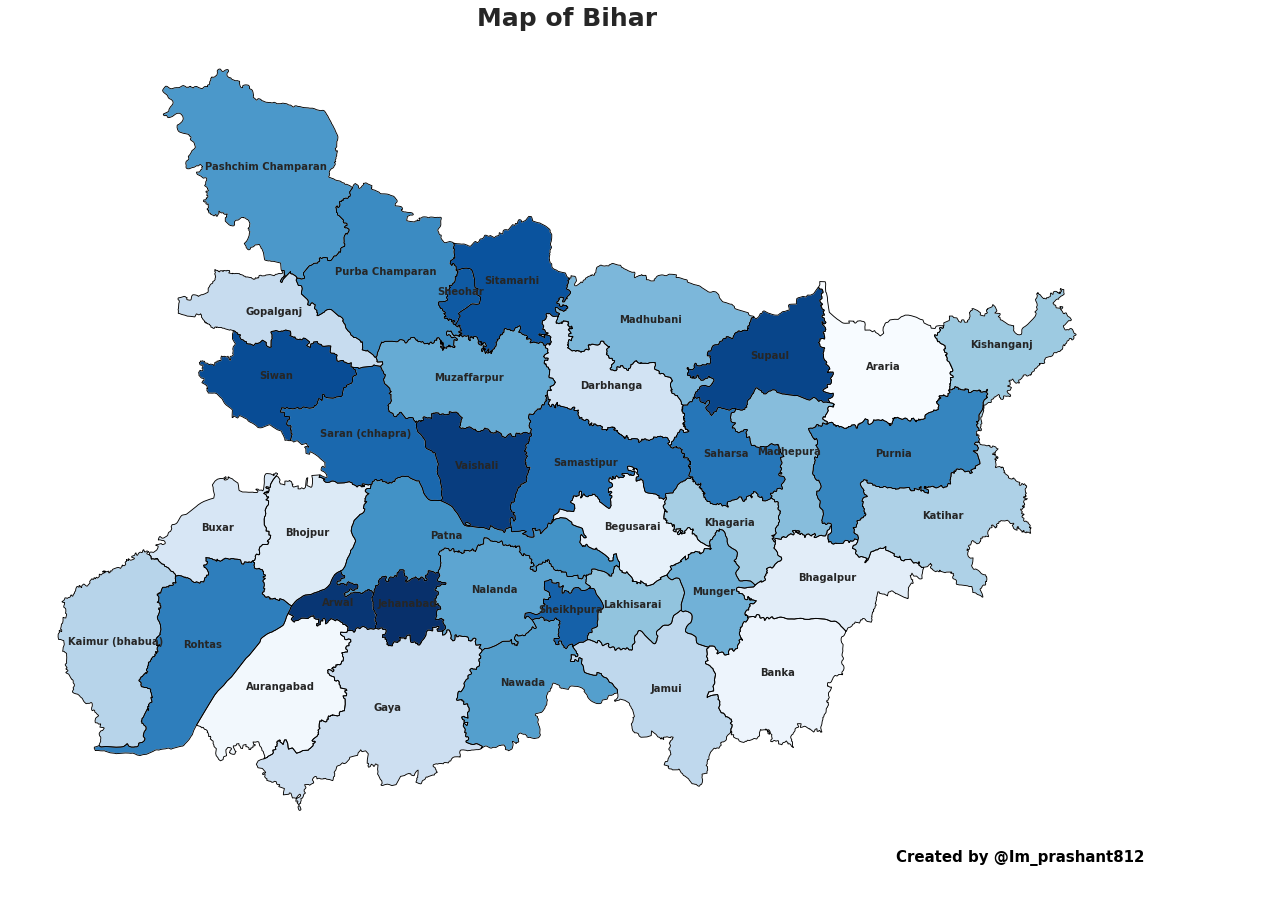

In [39]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
bihar_df.apply(lambda x: ax.annotate(s=x.DISTRICT, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
bihar_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
bihar_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))

ax.axis('off')
ax.set_title('Map of Bihar', fontdict={'fontsize': '25', 'fontweight' : 'bold','fontname':'Helvetica'})
#ax.annotate('Source: Directorate of Health Services, Himachal Pradesh',xy=(0.46, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.9, 0.07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [43]:
fp1 = 'drive/MyDrive/Colab Notebooks/Landslide-Analysis-main/Districts shape file/Census_2011/2011_Dist.shp'
hp_df = gpd.read_file(fp1)                           # Reads the shape file of Assam for plotting purpose
hp_df.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [44]:
hp_df  = hp_df[hp_df.ST_NM == "Himachal Pradesh"]

In [46]:
# Reads the data of latitudes and longitudes for the districts of Assam
district_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Landslide-Analysis-main/district wise lat and long.csv')

In [47]:
district_df = district_df[district_df.State == "Himachal Pradesh"]

In [48]:
district_df.drop(['Population in 2001', 'Population in 2011'], axis='columns', inplace=True)  # removing unnecessary data

In [49]:
district_df.head()

,State,District,Latitude,Longitude
130,Himachal Pradesh,Bilaspur,31.378042,76.653161
131,Himachal Pradesh,Chamba,32.667418,76.393541
132,Himachal Pradesh,Hamirpur,31.676685,76.497671
133,Himachal Pradesh,Kangra,32.140936,76.412059
134,Himachal Pradesh,Kinnaur,31.606672,78.516137


In [51]:
# Merge the data
merged_df = hp_df.set_index('DISTRICT').join(district_df.set_index('District'))
merged_df.head()
merged_df = merged_df[merged_df.Latitude.notna()]
merged_df.head()

,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
DISTRICT,,,,,,,,
Bilaspur,Himachal Pradesh,2,8,30,"POLYGON ((76.72980 31.58543, 76.73130 31.58222...",Himachal Pradesh,31.378042,76.653161
Chamba,Himachal Pradesh,2,1,23,"POLYGON ((76.57371 33.20634, 76.58079 33.20566...",Himachal Pradesh,32.667418,76.393541
Hamirpur,Himachal Pradesh,2,6,28,"POLYGON ((76.64071 31.87466, 76.63640 31.86874...",Himachal Pradesh,31.676685,76.497671
Kangra,Himachal Pradesh,2,2,24,"POLYGON ((77.07467 32.39696, 77.07612 32.39401...",Himachal Pradesh,32.140936,76.412059
Kinnaur,Himachal Pradesh,2,12,34,"POLYGON ((78.66791 32.08905, 78.66924 32.08394...",Himachal Pradesh,31.606672,78.516137


In [52]:
merged_df.reset_index(level=0, inplace=True)
merged_df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
0,Bilaspur,Himachal Pradesh,2,8,30,"POLYGON ((76.72980 31.58543, 76.73130 31.58222...",Himachal Pradesh,31.378042,76.653161
1,Chamba,Himachal Pradesh,2,1,23,"POLYGON ((76.57371 33.20634, 76.58079 33.20566...",Himachal Pradesh,32.667418,76.393541
2,Hamirpur,Himachal Pradesh,2,6,28,"POLYGON ((76.64071 31.87466, 76.63640 31.86874...",Himachal Pradesh,31.676685,76.497671
3,Kangra,Himachal Pradesh,2,2,24,"POLYGON ((77.07467 32.39696, 77.07612 32.39401...",Himachal Pradesh,32.140936,76.412059
4,Kinnaur,Himachal Pradesh,2,12,34,"POLYGON ((78.66791 32.08905, 78.66924 32.08394...",Himachal Pradesh,31.606672,78.516137
5,Kullu,Himachal Pradesh,2,4,26,"POLYGON ((77.86683 31.78334, 77.85535 31.78123...",Himachal Pradesh,31.909119,77.409226
6,Mandi,Himachal Pradesh,2,5,27,"POLYGON ((76.93939 32.06276, 76.94271 32.05743...",Himachal Pradesh,31.635806,76.965569
7,Shimla,Himachal Pradesh,2,11,33,"POLYGON ((77.77188 31.70369, 77.78346 31.69494...",Himachal Pradesh,31.155725,77.625730
8,Sirmaur,Himachal Pradesh,2,10,32,"POLYGON ((77.70217 30.76394, 77.70533 30.75552...",Himachal Pradesh,30.682764,77.431847
9,Solan,Himachal Pradesh,2,9,31,"POLYGON ((77.00308 31.29782, 77.01390 31.27877...",Himachal Pradesh,31.038643,76.944421


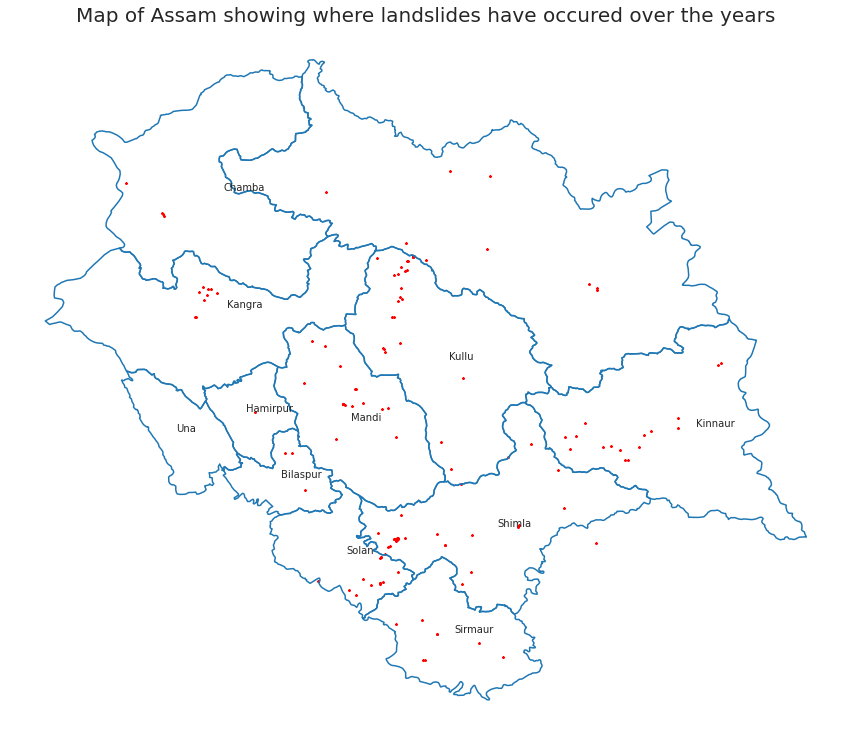

In [54]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
ax.axis('off')
ax.set_title('Map of Assam showing where landslides have occured over the years', fontdict={'fontsize': '20', 'fontweight' : '10'})

hp_df.boundary.plot(ax = ax)

geo_df = gpd.GeoDataFrame(geometry = geometry)

g = geo_df.plot(ax = ax, markersize = 5, color = 'red',marker = '*',label = 'Landslide')

for i in range(len(district_df)):
    plt.text(merged_df.Longitude[i],merged_df.Latitude[i],"{}".format(merged_df.DISTRICT[i]),size=10)
    
plt.show()


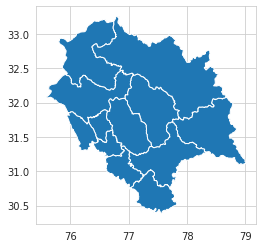

In [55]:
himachal_df = hp_df[['DISTRICT', 'geometry']]
himachal_df.plot()

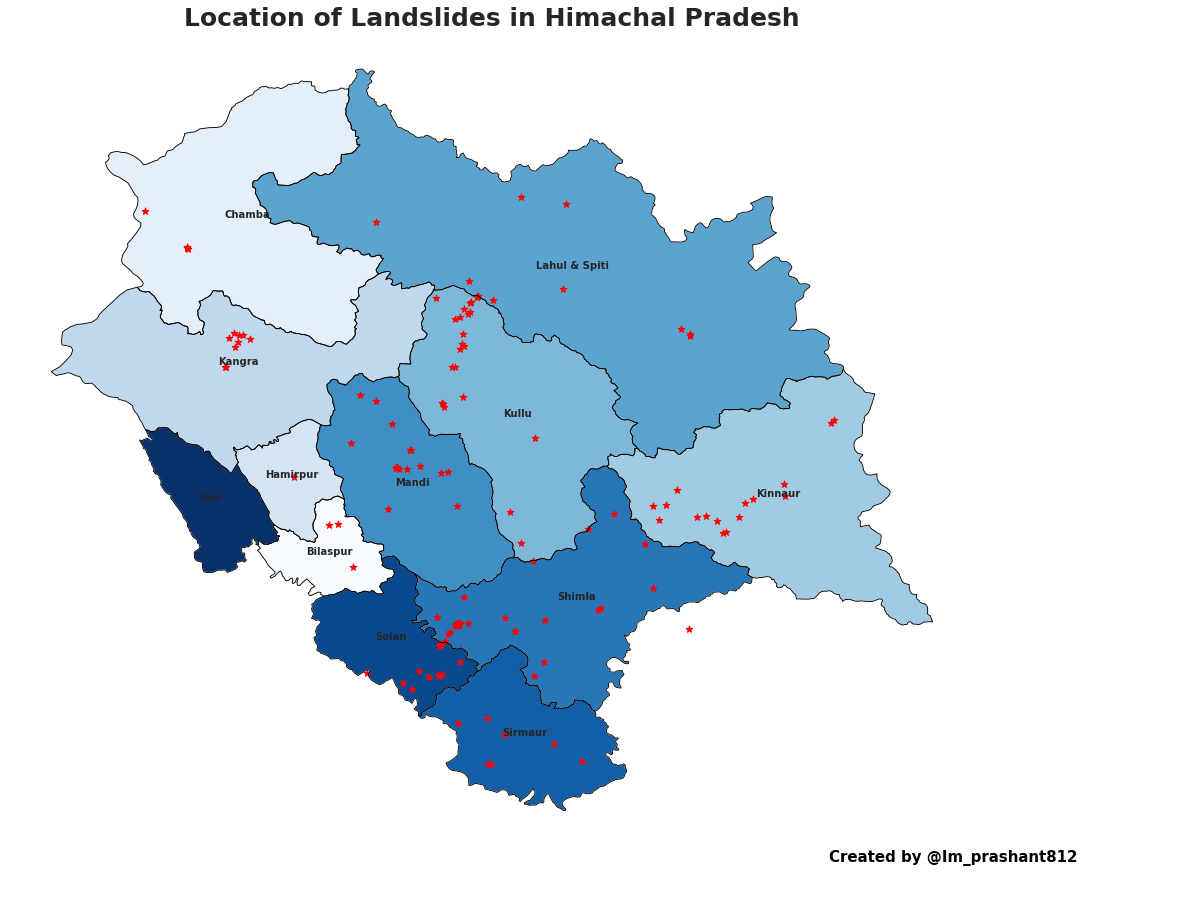

In [57]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
himachal_df.apply(lambda x: ax.annotate(s=x.DISTRICT, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
himachal_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
himachal_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
geo_df = gpd.GeoDataFrame(geometry = geometry)

g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Landslide')

ax.axis('off')
ax.set_title('Location of Landslides in Himachal Pradesh', fontdict={'fontsize': '25', 'fontweight' : 'bold','fontname':'Helvetica'})
#ax.annotate('Source: Directorate of Health Services, Himachal Pradesh',xy=(0.46, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.9, 0.07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

plt.rcParams.update({'font.sans-serif':'Helvetica'})